#### 目标：
#### 使用pytorch搭建神经网络模型，实现对KMNIST数据集的训练
#### 尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率
#### 调试超参数，观察学习率和批次大小对训练的影响
#### 写代码的时候，先写注释，记住步骤和流程

In [3]:
# 导入包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [4]:
# 定义超参数
LR = 1e-2  # 学习率
epochs = 20  #训练轮数
BATCH_SIZE = 128  # 批次

In [5]:
# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True, transform=ToTensor())

c:\Users\jianm\anaconda3\envs\bdai\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [6]:
# 定义模型训练函数(包括推理，损失函数，优化器），并保存训练历史
def train_model(epochs, model, trian_dl, lr):
    # 保存损失值
    train_history = []  
    
    # 交叉熵损失函数
    loss_fn = nn.CrossEntropyLoss()  
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 提取训练数据
        for data, target in trian_dl:
            # 前向运算
            output = model(data.reshape(-1, 784))
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()  # 所有参数梯度清零
            loss.backward()     # 计算梯度（参数.grad）
            optimizer.step()    # 更新参数

        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_history.append(loss.item())

    return train_history

In [9]:
# 定义绘制损失图函数
import matplotlib.pyplot as plt
def draw_train_history(train_history_list):
    for i,history in enumerate(train_history_list):   
        plt.plot(history, label=f'Modele{i}\' Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [10]:
# 定义测试模型准确率函数
def test_model_accuracy(test_dl,model):
    correct = 0
    total = 0
    with torch.no_grad():  # 不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
            total += target.size(0)  # size(0) 等效 shape[0]
            correct += (predicted == target).sum().item()
    return correct/total*100 

In [7]:
# 第一部分：调整模型结构，提升模型预测的准确率

In [11]:
# 创建模型结构
models = nn.ModuleList([
    nn.Sequential(
        nn.Linear(784, 64),  # 第一个网络：较小的隐藏层
        nn.Sigmoid(),
        nn.Linear(64, 10)
    ),
    nn.Sequential(
        nn.Linear(784, 64),  # 第二个网络：更换激活函数
        nn.ReLU(),
        nn.Linear(64, 10)
    ),
    nn.Sequential(
        nn.Linear(784, 512),  # 第三个网络：更大的隐藏层，更多的神经元
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    )
])

In [12]:
# 加载训练数据
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据

In [14]:
# 训练模型
train_history1 = train_model(epochs, models[0], train_dl, lr=LR)

Epoch:0 Loss: 2.1867592334747314
Epoch:1 Loss: 1.9837803840637207
Epoch:2 Loss: 1.690426230430603
Epoch:3 Loss: 1.6801339387893677
Epoch:4 Loss: 1.435889720916748
Epoch:5 Loss: 1.3191462755203247
Epoch:6 Loss: 1.1381301879882812
Epoch:7 Loss: 1.0743826627731323
Epoch:8 Loss: 1.1240887641906738
Epoch:9 Loss: 1.0994535684585571
Epoch:10 Loss: 0.8438629508018494
Epoch:11 Loss: 1.0372439622879028
Epoch:12 Loss: 0.7586820721626282
Epoch:13 Loss: 0.8402280211448669
Epoch:14 Loss: 0.6870682835578918
Epoch:15 Loss: 0.7514200806617737
Epoch:16 Loss: 0.7024650573730469
Epoch:17 Loss: 0.6525532603263855
Epoch:18 Loss: 0.7225794792175293
Epoch:19 Loss: 0.6413992047309875


In [15]:
# 训练模型
train_history2 = train_model(epochs, models[1], train_dl, lr=LR)

Epoch:0 Loss: 1.4928308725357056
Epoch:1 Loss: 0.9586434364318848
Epoch:2 Loss: 0.7149538397789001
Epoch:3 Loss: 0.6751465201377869
Epoch:4 Loss: 0.6729303002357483
Epoch:5 Loss: 0.4465618133544922
Epoch:6 Loss: 0.6784879565238953
Epoch:7 Loss: 0.486759752035141
Epoch:8 Loss: 0.4997588098049164
Epoch:9 Loss: 0.47444701194763184
Epoch:10 Loss: 0.514456033706665
Epoch:11 Loss: 0.38131454586982727
Epoch:12 Loss: 0.4863508939743042
Epoch:13 Loss: 0.4296528995037079
Epoch:14 Loss: 0.4926011264324188
Epoch:15 Loss: 0.43366214632987976
Epoch:16 Loss: 0.4332254230976105
Epoch:17 Loss: 0.46937987208366394
Epoch:18 Loss: 0.485066682100296
Epoch:19 Loss: 0.3499591052532196


In [16]:
# 训练模型
train_history3 = train_model(epochs, models[2], train_dl, lr=LR)

Epoch:0 Loss: 1.8541884422302246
Epoch:1 Loss: 1.1754108667373657
Epoch:2 Loss: 0.8816795349121094
Epoch:3 Loss: 0.598686158657074
Epoch:4 Loss: 0.5997135043144226
Epoch:5 Loss: 0.5251555442810059
Epoch:6 Loss: 0.5800347328186035
Epoch:7 Loss: 0.3716028034687042
Epoch:8 Loss: 0.4341294765472412
Epoch:9 Loss: 0.4021359980106354
Epoch:10 Loss: 0.3655904531478882
Epoch:11 Loss: 0.2948363423347473
Epoch:12 Loss: 0.41726359724998474
Epoch:13 Loss: 0.3337880074977875
Epoch:14 Loss: 0.3096688687801361
Epoch:15 Loss: 0.34755659103393555
Epoch:16 Loss: 0.30873996019363403
Epoch:17 Loss: 0.3210734724998474
Epoch:18 Loss: 0.4214746952056885
Epoch:19 Loss: 0.16370789706707


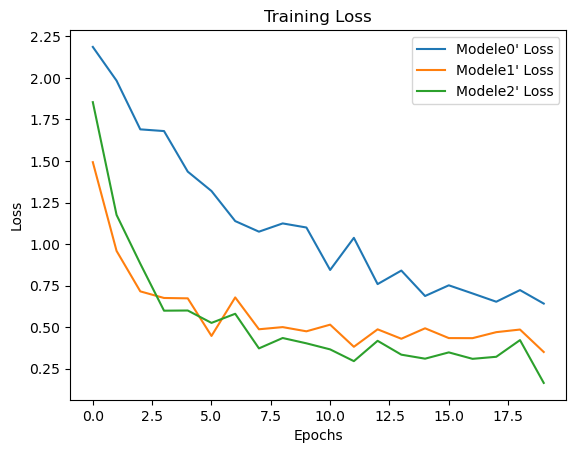

In [19]:
# 绘制模型对应损失值
train_history_list = [train_history1,train_history2,train_history3]
draw_train_history(train_history_list)

In [20]:
# 测试模型准确率
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [22]:
for i in range(len(models)):
    print(f'Part1 Model{i} Accuracy:', test_model_accuracy(test_dl, models[i]))

Part1 Model0 Accuracy: 65.52
Part1 Model1 Accuracy: 76.85
Part1 Model2 Accuracy: 80.57


In [ ]:
### 第一部分结论：模型2的效果最好，损失函数收敛效果最佳，准确率最高

In [ ]:
### 第二部分：观察学习率对训练的影响

In [ ]:
# 创建模型结构,3个相同的，取第一部分效果最好的结构
models = nn.ModuleList([
    nn.Sequential(
        nn.Linear(784, 512),  # 第三个网络：更大的隐藏层，更多的神经元
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ) for _ in range(3)
])

In [28]:
# 加载训练数据
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [32]:
# 用不同的学习率进行模型训练
# train_history_list2 = [train_model(epochs,model,train_dl,lr) for model,lr in zip(models,[0.01,0.001,0.0001])]
train_history_21 = train_model(epochs,models[0],train_dl,lr=0.01)
train_history_22 = train_model(epochs,models[1],train_dl,lr=0.001)
train_history_23 = train_model(epochs,models[2],train_dl,lr=0.0001)
train_history_list2 = [train_history_21,train_history_22,train_history_23]

Epoch:0 Loss: 0.35601890087127686
Epoch:1 Loss: 0.57624351978302
Epoch:2 Loss: 0.5016586184501648
Epoch:3 Loss: 0.5020732879638672
Epoch:4 Loss: 0.5112802386283875
Epoch:5 Loss: 0.5309814810752869
Epoch:6 Loss: 0.364366739988327
Epoch:7 Loss: 0.4047304391860962
Epoch:8 Loss: 0.3715464174747467
Epoch:9 Loss: 0.5856452584266663
Epoch:10 Loss: 0.4561341106891632
Epoch:11 Loss: 0.57262122631073
Epoch:12 Loss: 0.4610404074192047
Epoch:13 Loss: 0.3980293571949005
Epoch:14 Loss: 0.515710711479187
Epoch:15 Loss: 0.3647160232067108
Epoch:16 Loss: 0.3183212876319885
Epoch:17 Loss: 0.5423262715339661
Epoch:18 Loss: 0.5346810221672058
Epoch:19 Loss: 0.34587815403938293
Epoch:0 Loss: 0.5568647980690002
Epoch:1 Loss: 0.2997564971446991
Epoch:2 Loss: 0.27550560235977173
Epoch:3 Loss: 0.2872420847415924
Epoch:4 Loss: 0.2716192603111267
Epoch:5 Loss: 0.31778934597969055
Epoch:6 Loss: 0.4750441610813141
Epoch:7 Loss: 0.32338228821754456
Epoch:8 Loss: 0.3679830729961395
Epoch:9 Loss: 0.36783477663993835


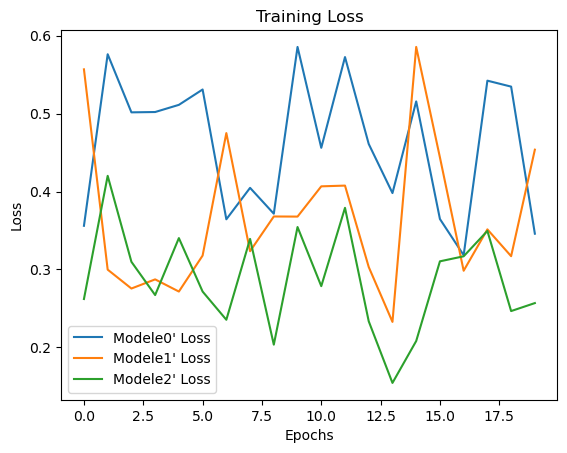

In [33]:
# 绘制模型对应损失值
draw_train_history(train_history_list2)

In [34]:
for i in range(len(models)):
    print(f'Part2 Model{i} Accuracy:', test_model_accuracy(test_dl, models[i]))

Part2 Model0 Accuracy: 74.69
Part2 Model1 Accuracy: 78.21000000000001
Part2 Model2 Accuracy: 80.42


In [35]:
### 第三部分  不同批次数对模型的影响

# 创建模型结构,3个相同的，取第一部分效果最好的结构
models = nn.ModuleList([
    nn.Sequential(
        nn.Linear(784, 512),  # 第三个网络：更大的隐藏层，更多的神经元
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ) for _ in range(3)
])

In [38]:
train_datas = [DataLoader(train_data,batch_size=bs,shuffle=True) for bs in [128,256,512]]

In [39]:
train_history_list3 = [train_model(epochs,model,dl,lr=0.001) for model,dl in zip(models,train_datas)]

Epoch:0 Loss: 1.5591603517532349
Epoch:1 Loss: 1.4265176057815552
Epoch:2 Loss: 1.359082579612732
Epoch:3 Loss: 1.179542899131775
Epoch:4 Loss: 1.3869584798812866
Epoch:5 Loss: 1.2251760959625244
Epoch:6 Loss: 0.9222657680511475
Epoch:7 Loss: 1.0671299695968628
Epoch:8 Loss: 1.0116621255874634
Epoch:9 Loss: 0.949088990688324
Epoch:10 Loss: 0.9905876517295837
Epoch:11 Loss: 0.9687677025794983
Epoch:12 Loss: 0.9574853777885437
Epoch:13 Loss: 1.0518449544906616
Epoch:14 Loss: 0.7979943752288818
Epoch:15 Loss: 0.893071174621582
Epoch:16 Loss: 0.9051814675331116
Epoch:17 Loss: 0.7933259010314941
Epoch:18 Loss: 0.7602261900901794
Epoch:19 Loss: 0.719696581363678
Epoch:0 Loss: 1.10480535030365
Epoch:1 Loss: 1.111890435218811
Epoch:2 Loss: 1.0440715551376343
Epoch:3 Loss: 0.9513508677482605
Epoch:4 Loss: 1.023267149925232
Epoch:5 Loss: 0.8893963694572449
Epoch:6 Loss: 0.9043828845024109
Epoch:7 Loss: 0.8604621291160583
Epoch:8 Loss: 0.767833411693573
Epoch:9 Loss: 0.9874176979064941
Epoch:10 L

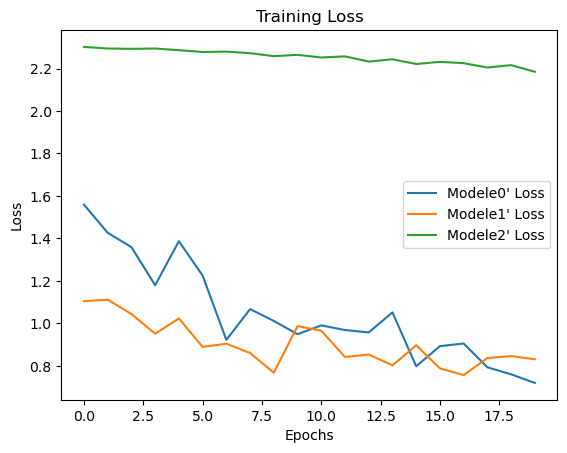

In [40]:
# 绘制模型对应损失值
draw_train_history(train_history_list3)

In [41]:
for i in range(len(models)):
    print(f'Part3 Model{i} Accuracy:', test_model_accuracy(test_dl, models[i]))

Part3 Model0 Accuracy: 63.32
Part3 Model1 Accuracy: 62.79
Part3 Model2 Accuracy: 36.03


结论：
1，激活函数ReLu效果更好，两层隐藏层效果更好，
2，模型结构一致的情况下，学习率取0.0001效果正常，但是损失值波动较大，学习率的影响不明显；
3，模型结构一致的情况下，批次=128效果最好，但是准确率依然不高。